In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
dataset=r'C:\Users\Lenovo\Desktop\Data'

In [20]:
INIT_LR=1e-3
EPOCHS=25
BS=8

In [21]:
args={}
args['dataset']=dataset

In [22]:
args

{'dataset': 'C:\\Users\\Lenovo\\Desktop\\Data'}

In [23]:
import numpy as np
import cv2
import os
from imutils import paths
iPaths=list(paths.list_images(args["dataset"]))
data=[]
labels=[]

for  iPath in iPaths:
    label=iPath.split(os.path.sep)[-2] 
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data=np.array(data)/255.0
labels=np.array(labels)


In [24]:
image[0]

array([[ 65,  65,  65],
       [ 68,  68,  68],
       [ 66,  66,  66],
       [ 62,  62,  62],
       [106, 106, 106],
       [140, 140, 140],
       [157, 157, 157],
       [131, 131, 131],
       [121, 121, 121],
       [102, 102, 102],
       [109, 109, 109],
       [112, 112, 112],
       [105, 105, 105],
       [101, 101, 101],
       [100, 100, 100],
       [106, 106, 106],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112],
       [123, 123, 123],
       [135, 135, 135],
       [135, 135, 135],
       [123, 123, 123],
       [115, 115, 115],
       [ 98,  98,  98],
       [ 73,  73,  73],
       [ 75,  75,  75],
       [ 77,  77,  77],
       [ 78,  78,  78],
       [ 81,  81,  81],
       [ 85,  85,  85],
       [ 87,  87,  87],
       [ 88,  88,  88],
       [ 84,  84,  84],
       [ 90,  90,  90],
       [ 84,  84,  84],
       [ 83,  83,  83],
       [ 85,  85,  85],
       [ 84,  84,  84],
       [ 75,  75,  75],
       [ 79,  79,  79],
       [ 74,  74

In [25]:
labels


array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [26]:
import os
dataset = r'C:\Users\Lenovo\Desktop\Data'

In [27]:
Cimages = os.listdir(dataset+r"\\Covid")
Nimages = os.listdir(dataset+r"\Normal")

In [28]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
LB = LabelBinarizer()  
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [30]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  
hModel = bModel.output 
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [31]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [32]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

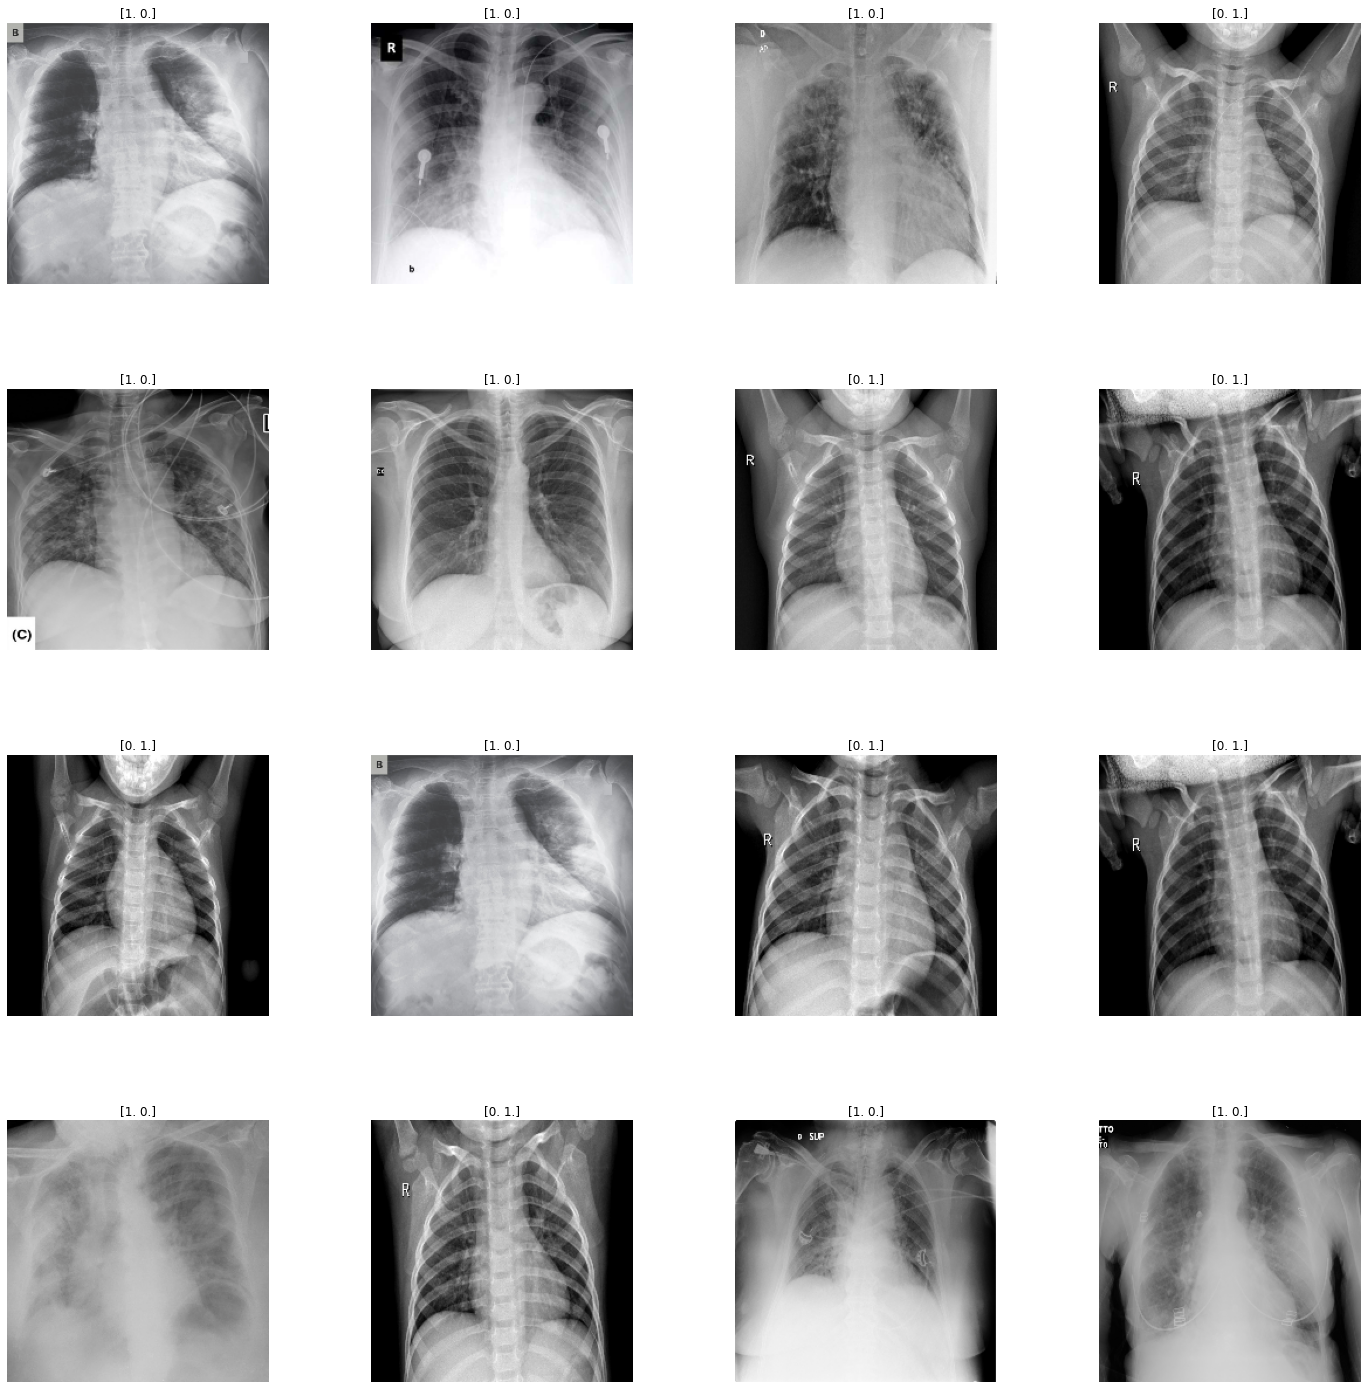

In [35]:
W_grid = 4 
L_grid = 4 
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) 
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4) 

In [36]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")

Compiling Starts


In [37]:
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
20/20 [==============================] - 45s 2s/step - loss: 0.6672 - accuracy: 0.6438 - val_loss: 0.5225 - val_accuracy: 0.6750
Epoch 2/25
20/20 [==============================] - 46s 2s/step - loss: 0.4725 - accuracy: 0.8062 - val_loss: 0.3748 - val_accuracy: 0.9000
Epoch 3/25
20/20 [==============================] - 46s 2s/step - loss: 0.3300 - accuracy: 0.9062 - val_loss: 0.2746 - val_accuracy: 0.9750
Epoch 4/25
20/20 [==============================] - 46s 2s/step - loss: 0.2518 - accuracy: 0.9500 - val_loss: 0.2101 - val_accuracy: 0.9750
Epoch 5/25
20/20 [==============================] - 46s 2s/step - loss: 0.1853 - accuracy: 0.9688 - val_loss: 0.1725 - val_accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 47s 2s/step - loss: 0.1646 - accuracy: 0.9563 - val_loss: 0.1406 - val_accuracy: 0.9750
Epoch 7/25
20/20 [==============================] - 47s 2s/step - loss: 0.1214 - acc

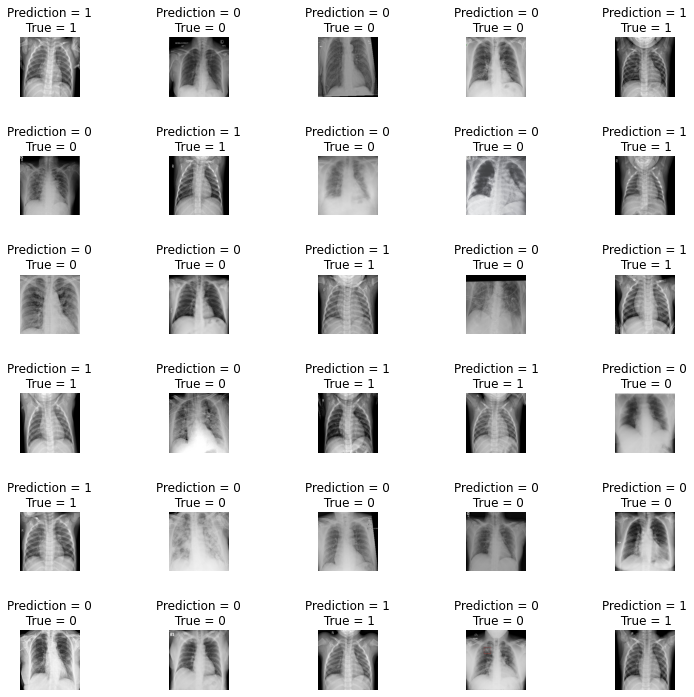

In [38]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace=1)

In [39]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


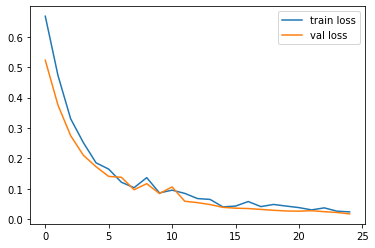

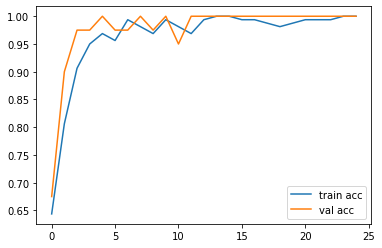

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Validation_loss.jpg')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Validation_accuracy.jpg')

In [42]:
model.save(r'C:\Users\Lenovo\Desktop\Data\model.h5')
# model.save(r'C:\Users\Lenovo\Desktop\Minor Project\Jupyter code\m.h5')

In [1]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img = image.load_img(r'C:\Users\Lenovo\Desktop\Data\Covid\16664_1_1.jpg', target_size=(224, 224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Desktop\\Data\\Covid\\16664_1_1.jpg'